In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
train = pd.read_csv('Botanist_Training_Set.csv')

In [3]:
train_image = []
y = []
for i in tqdm(range(40000)):
    img = image.load_img('train/'+train['FileName'][i].astype('str')+'.jpg', target_size=(256,256,3))
    img = image.img_to_array(img)
    img = (img-127.5)/127.5
    train_image.append(img)
    y.append(train['Label'][i])
# X = np.array(train_image)

100%|██████████| 40000/40000 [01:16<00:00, 521.09it/s]


In [4]:
# y = train['Label'].values
y = to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(train_image)[:40000],y[:40000],random_state=42,test_size=0.2)

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(39,activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test, y_test),batch_size=64)

Epoch 1/15
500/500 [==============================] - 148s 287ms/step - loss: 4.2927 - accuracy: 0.2604 - val_loss: 1.3976 - val_accuracy: 0.5999
Epoch 2/15
500/500 [==============================] - 141s 282ms/step - loss: 1.5953 - accuracy: 0.5398 - val_loss: 0.8582 - val_accuracy: 0.7565
Epoch 3/15
500/500 [==============================] - 141s 282ms/step - loss: 1.1494 - accuracy: 0.6484 - val_loss: 0.6821 - val_accuracy: 0.7926
Epoch 4/15
500/500 [==============================] - 141s 283ms/step - loss: 0.8360 - accuracy: 0.7323 - val_loss: 0.5547 - val_accuracy: 0.8248
Epoch 5/15
500/500 [==============================] - 141s 283ms/step - loss: 0.6551 - accuracy: 0.7835 - val_loss: 0.5388 - val_accuracy: 0.8361
Epoch 6/15
500/500 [==============================] - 141s 282ms/step - loss: 0.5335 - accuracy: 0.8207 - val_loss: 0.5368 - val_accuracy: 0.8306
Epoch 7/15
500/500 [==============================] - 141s 282ms/step - loss: 0.4701 - accuracy: 0.8396 - val_loss: 0.5178 -

In [8]:
model.save('final_model_v4.h5')

In [4]:
reconstructed_model = keras.models.load_model("final_model_v4.h5")

In [5]:
prediction = reconstructed_model.predict_classes(np.array(train_image)[40000:])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [6]:
y_act = y[40000:]

In [7]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(np.array(y_act), prediction, normalize=False)

4275

In [13]:

sample['Label'] = prediction
sample.to_csv('sample_cnn.csv',header=True,index=False)

NameError: name 'sample' is not defined

In [10]:
y_act[1]

25

In [14]:
prediction[-1]

28

In [15]:
y_act[-1]

28

In [16]:
acc = []
fal = []
for i in y_act:
    if y_act[i] == prediction[i]:
        acc.append(1)
    else:
        fal.append(1)        

In [17]:
len(acc)/(len(acc)+len(fal))

0.9182

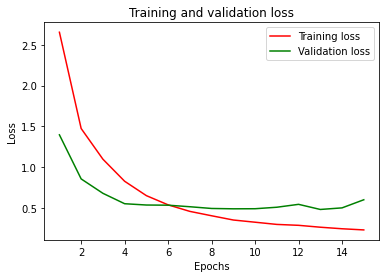

In [8]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

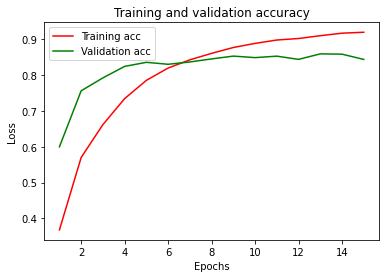

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()